<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Graduate_Admission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook analyzes admission data where the output variable is the chance of admission.
The goal is to predict the chance of admission based on input features using an Artificial Neural Network (ANN).
The notebook includes steps such as data loading, preprocessing, model building, training, evaluation, and prediction.
The ANN architecture typically consists of input, hidden, and output layers, with appropriate activation functions
(e.g., ReLU for hidden layers, softmax for multiclass classification in the output layer), loss function
(e.g., mean squared error for regression), and optimizer (e.g., Adam optimizer).
Training involves optimizing the model's weights and biases using backpropagation and gradient descent.
Evaluation metrics such as mean squared error, accuracy, or other relevant metrics are used to assess the model's performance.
The notebook may also include visualization of training/validation metrics.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('admission_data.csv')
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [4]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [6]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [8]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
243,325,114,3,3.5,3.0,9.04,1
277,320,101,2,2.5,3.0,8.62,0
231,319,106,3,3.5,2.5,8.33,1
361,334,116,4,4.0,3.5,9.54,1
398,312,103,3,3.5,4.0,8.78,0
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
458,312,100,1,3.0,3.0,8.53,1
244,314,107,2,2.5,4.0,8.56,0
215,330,116,5,5.0,4.5,9.36,1


In [9]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
219,312,104,3,3.5,3.5,8.42,0
103,317,104,2,4.5,4.0,8.47,0
86,315,106,3,4.5,3.5,8.42,0
201,315,110,2,3.5,3.0,8.46,1
330,327,113,3,3.5,3.0,8.66,1
...,...,...,...,...,...,...,...
130,339,114,5,4.0,4.5,9.76,1
278,308,103,2,3.0,3.5,8.49,0
356,327,109,3,3.5,4.0,8.77,1
141,332,118,2,4.5,3.5,9.36,1


In [10]:
from sklearn.preprocessing import  MinMaxScaler

In [11]:
scalar = MinMaxScaler()

In [12]:
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

In [15]:
# input Layer
model.add(Dense(32,activation='relu',input_dim=7))

# Two hidden layers, we can have more hidden layers or more neurons. That depends on our understanding.
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

# Output Layer
model.add(Dense(1,activation='linear'))

C:\Users\Admin\anaconda3\envs\DL0\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,401 (9.38 KB)

 Trainable params: 2,401 (9.38 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [18]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.4621 - val_loss: 0.2414
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1985 - val_loss: 0.0683
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0525 - val_loss: 0.0287
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - val_loss: 0.0334
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - val_loss: 0.0183
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.0118
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 - val_loss: 0.0089
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - val_loss: 0.0073
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - val_loss: 0.0064
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 - val_loss: 0.0060
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0

In [19]:
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8099912252326782

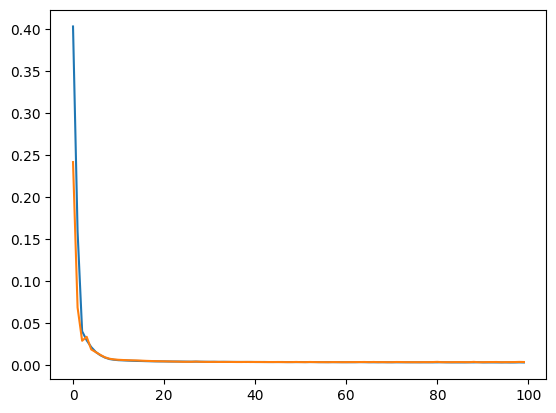

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])